# UNIDAD 2 - PROYECTO: EDA + REGRESIÓN + PRUEBAS DE HIPÓTESIS 

## Nombre del estudiante: Axel Martin Vega Espinoza
## Número de control: 20120168

# ETAPA 1: Exploración de los datos.

## Paso 1: Cargue el dataset ("Retrasos.csv") en un dataframe, muestre información básica, enliste las columnas numéricas y las columnas objeto.

In [1]:
# Importación de las librerías a utilizar.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Quitar limite de columnas máximas
pd.set_option('display.max_columns', None)

In [3]:
# Obtener DataFrame
df = pd.read_csv("datasets/Retrasos.csv")

In [4]:
# las primeras 5 filas del dataset
display(df.head())

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,unit_cost,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203,Nigeria,PMO - US,Direct Drop,EXW,Air,1,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,2996,266644.00,89.00,0.89,0.3,"Alere Medical Co., Ltd.",Yes,1426,33279.83,expensive,373.83
1,30998,Botswana,PMO - US,Direct Drop,EXW,Air,0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,NaN,Test kit,20,25,800.00,32.00,1.60,NaN,"Trinity Biotech, Plc",Yes,10,559.89,reasonable,1.72
2,69871,Vietnam,PMO - US,Direct Drop,EXW,Air,0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60,22925,110040.00,4.80,0.08,NaN,Hetero Unit III Hyderabad IN,Yes,3723,19056.13,expensive,181.57
3,17648,South Africa,PMO - US,Direct Drop,DDP,Ocean,0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,152535,361507.95,2.37,0.04,NaN,"Aurobindo Unit III, India",Yes,7698,11372.23,expensive,779.41
4,5647,Uganda,PMO - US,Direct Drop,EXW,Air,0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,NaN,Test kit - Ancillary,100,850,8.50,0.01,0.00,NaN,Inverness Japan,Yes,56,360.00,reasonable,0.01


In [5]:
#las ultimas 5 filas del dataset
display(df.tail())

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,unit_cost,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
995,13608,Uganda,PMO - US,Direct Drop,DDP,Air,0,No,ARV,Adult,ASPEN PHARMACARE,"Etravirine 100mg [Intelence], tablets, 120 Tabs",Etravirine,Intelence,100mg,Tablet,120,121,9075.00,75.00,0.62,NaN,"Janssen-Cilag, Latina, IT",Yes,43,199.00,reasonable,12.72
996,80394,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,NaN,Test kit,20,292,9344.00,32.00,1.60,NaN,"Trinity Biotech, Plc",Yes,99,2162.55,reasonable,13.10
997,61675,Zambia,PMO - US,Direct Drop,EXW,Air,1,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,2127,170160.00,80.00,0.80,NaN,"Alere Medical Co., Ltd.",Yes,881,14019.38,expensive,210.49
998,39182,South Africa,PMO - US,Direct Drop,DDP,Ocean,0,No,ARV,Adult,Aurobindo Pharma Limited,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30,191011,861459.61,4.51,0.15,NaN,"Aurobindo Unit III, India",Yes,16234,14439.17,expensive,1421.41
999,5645,Botswana,PMO - US,Direct Drop,EXW,Air,0,No,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine HIV Kit, without Lancets, 1...","HIV 1/2, Determine HIV Kit, without Lancets",Determine,NaN,Test kit,100,200,14398.00,71.99,0.72,NaN,Inverness Japan,Yes,46,1028.18,reasonable,23.04


In [6]:
# Tipo de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   country                   1000 non-null   object 
 2   managed_by                1000 non-null   object 
 3   fulfill_via               1000 non-null   object 
 4   vendor_inco_term          1000 non-null   object 
 5   shipment_mode             1000 non-null   object 
 6   late_delivery             1000 non-null   int64  
 7   late                      1000 non-null   object 
 8   product_group             1000 non-null   object 
 9   sub_classification        1000 non-null   object 
 10  vendor                    1000 non-null   object 
 11  item_description          1000 non-null   object 
 12  molecule_test_type        1000 non-null   object 
 13  brand                     1000 non-null   object 
 14  dosage   

In [7]:
print(df.select_dtypes(include='number').info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1000 non-null   int64  
 1   late_delivery             1000 non-null   int64  
 2   unit_of_measure_per_pack  1000 non-null   int64  
 3   line_item_quantity        1000 non-null   int64  
 4   line_item_value           1000 non-null   float64
 5   pack_price                1000 non-null   float64
 6   unit_price                1000 non-null   float64
 7   unit_cost                 17 non-null     float64
 8   weight_kilograms          1000 non-null   int64  
 9   freight_cost_usd          986 non-null    float64
 10  line_item_insurance_usd   966 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 86.1 KB
None


In [8]:
print(df.select_dtypes(include='object').info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 1000 non-null   object
 1   managed_by              1000 non-null   object
 2   fulfill_via             1000 non-null   object
 3   vendor_inco_term        1000 non-null   object
 4   shipment_mode           1000 non-null   object
 5   late                    1000 non-null   object
 6   product_group           1000 non-null   object
 7   sub_classification      1000 non-null   object
 8   vendor                  1000 non-null   object
 9   item_description        1000 non-null   object
 10  molecule_test_type      1000 non-null   object
 11  brand                   1000 non-null   object
 12  dosage                  591 non-null    object
 13  dosage_form             1000 non-null   object
 14  manufacturing_site      1000 non-null   object
 15  first

## Paso 2: Haga conteo de datos nulos (ordene de forma descendente); de las variables numéricas, muestre datos estadísticos; de las variables de tipo objeto, determine cuáles sí son factibles para convertir en categóricas y el porqué.

In [9]:
df.isna().sum().sort_values(ascending=True)

id                            0
weight_kilograms              0
first_line_designation        0
manufacturing_site            0
unit_price                    0
pack_price                    0
line_item_value               0
line_item_quantity            0
unit_of_measure_per_pack      0
dosage_form                   0
molecule_test_type            0
brand                         0
vendor                        0
sub_classification            0
product_group                 0
late                          0
late_delivery                 0
shipment_mode                 0
vendor_inco_term              0
fulfill_via                   0
managed_by                    0
country                       0
item_description              0
freight_cost_groups          14
freight_cost_usd             14
line_item_insurance_usd      34
dosage                      409
unit_cost                   983
dtype: int64

In [10]:
for column in df.columns:
    if ((df[column].dtype == "int64") or (df[column].dtype == "float64")):
        print(df[column].describe())
        print("\n")

count     1000.000000
mean     39239.957000
std      24878.296938
min          1.000000
25%      17055.000000
50%      38283.500000
75%      62036.500000
max      82105.000000
Name: id, dtype: float64


count    1000.00000
mean        0.06100
std         0.23945
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: late_delivery, dtype: float64


count    1000.000000
mean       78.675000
std        91.124569
min         1.000000
25%        30.000000
50%        60.000000
75%       100.000000
max      1000.000000
Name: unit_of_measure_per_pack, dtype: float64


count      1000.000000
mean      15923.379000
std       37793.936877
min           1.000000
25%         600.000000
50%        2992.000000
75%       11733.000000
max      515000.000000
Name: line_item_quantity, dtype: float64


count    1.000000e+03
mean     1.542272e+05
std      2.160517e+05
min      0.000000e+00
25%      1.181160e+04
50%      6.360000e+04
75%      2.178262e+05
m

In [11]:
print("Las variables objeto son:")
for column in df.columns:
    if (df[column].dtype == "object"):
        print(column)

Las variables objeto son:
country
managed_by
fulfill_via
vendor_inco_term
shipment_mode
late
product_group
sub_classification
vendor
item_description
molecule_test_type
brand
dosage
dosage_form
manufacturing_site
first_line_designation
freight_cost_groups


In [12]:
print("Sus datos:")
for column in df.columns:
    if (df[column].dtype == "object"):
        print("Para la columna ", column, " estan los siguientes datos únicos:" )
        print(df[column].unique())
        print("Total: ", df[column].nunique())
        if (df[column].nunique() <= 5):
            print("Se puede categorizar, preferentemente, mediante label encoding o one-hot encoding")
        else:
            print("Se puede categorizar mediante label encoding")
        print("\n")

Sus datos:
Para la columna  country  estan los siguientes datos únicos:
['Nigeria' 'Botswana' 'Vietnam' 'South Africa' 'Uganda' 'Ethiopia' 'Sudan'
 "Cote d'Ivoire" 'Malawi' 'Zambia' 'Mozambique' 'Tanzania' 'Ghana'
 'Namibia' 'Rwanda' 'Cameroon' 'Haiti' 'South Sudan' 'Kenya' 'Guyana'
 'Senegal' 'Zimbabwe' 'Guatemala' 'Burundi' 'Congo, DRC' 'Angola'
 'Dominican Republic' 'Liberia' 'Pakistan' 'Swaziland' 'Mali']
Total:  31
Se puede categorizar mediante label encoding


Para la columna  managed_by  estan los siguientes datos únicos:
['PMO - US']
Total:  1
Se puede categorizar, preferentemente, mediante label encoding o one-hot encoding


Para la columna  fulfill_via  estan los siguientes datos únicos:
['Direct Drop']
Total:  1
Se puede categorizar, preferentemente, mediante label encoding o one-hot encoding


Para la columna  vendor_inco_term  estan los siguientes datos únicos:
['EXW' 'DDP' 'CIP' 'FCA' 'DDU']
Total:  5
Se puede categorizar, preferentemente, mediante label encoding o one-ho

<p style ="color:blue;">
    Gran cantidad de las columnas objeto pueden ser convertidas a categóricas, sobre todo porque algunas columnas cuentan con pocos valores posibles (menos de 6 valores posibles).
</p>

## Paso 3: Identifique si las columnas numéricas cuentan con anomalías, para ello puede apoyarse de gráficos; identifique si las columnas objeto tienen inconsistencias, para ello puede apoyarse de gráficos.

Columna:  1


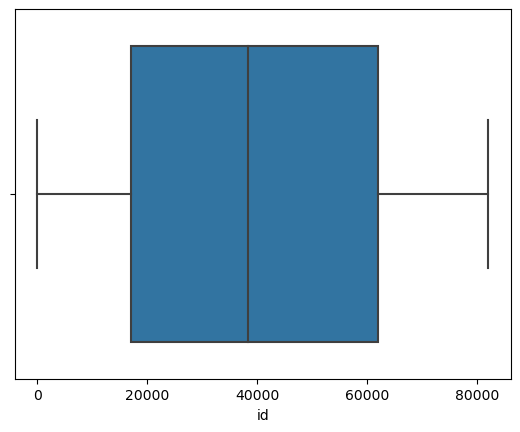

Columna:  2


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


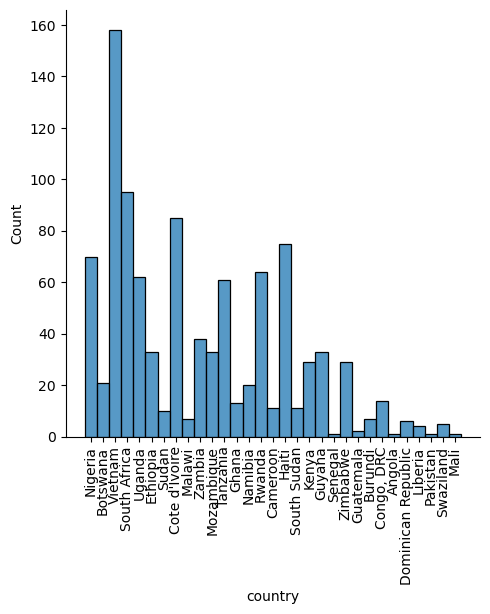

Columna:  3


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


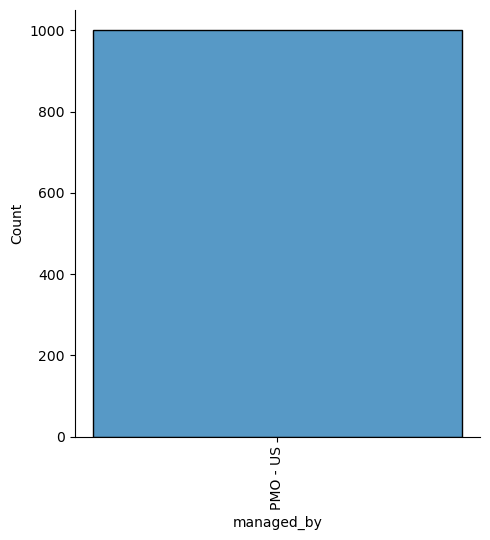

Columna:  4


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


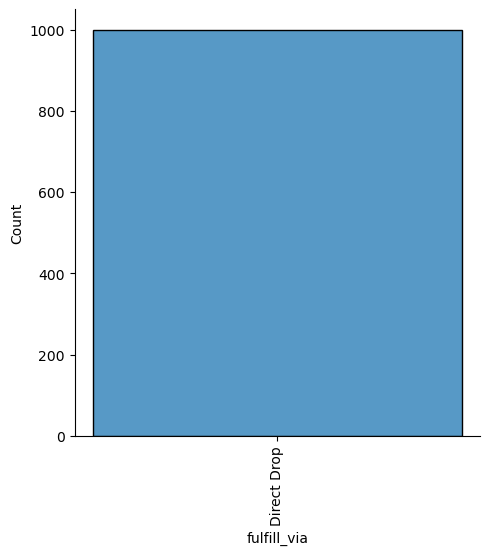

Columna:  5


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


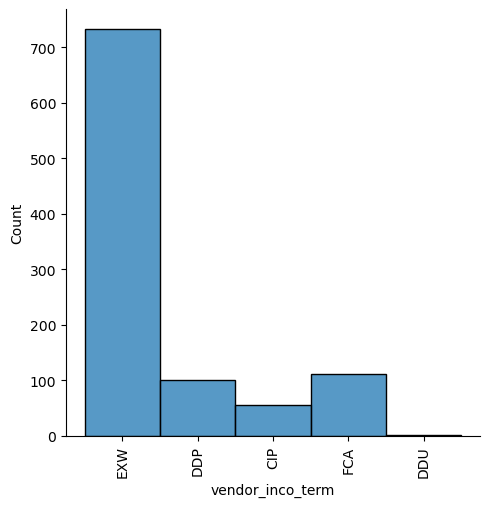

Columna:  6


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


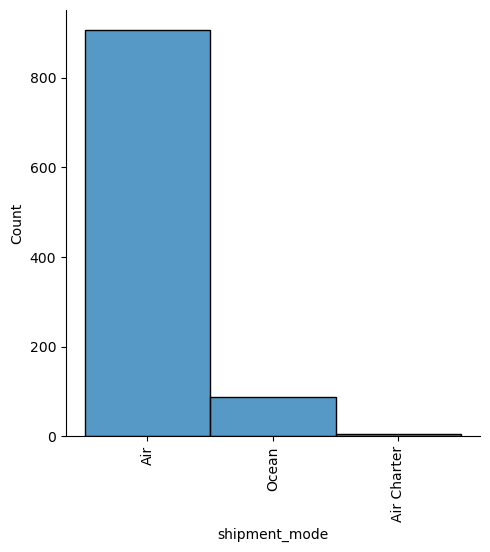

Columna:  7


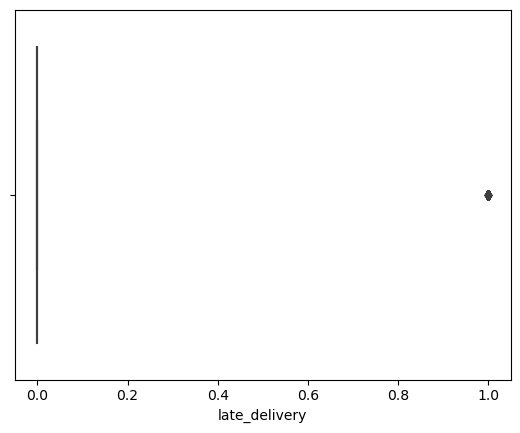

Columna:  8


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


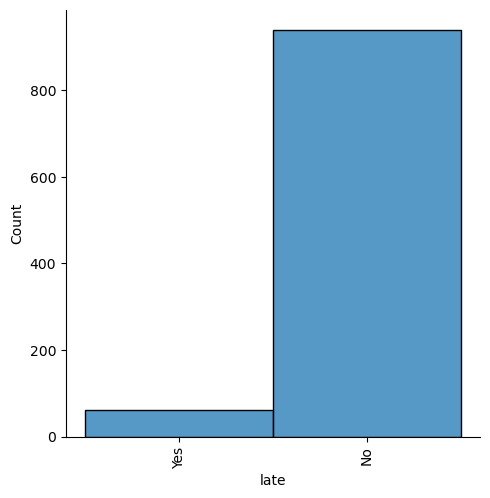

Columna:  9


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


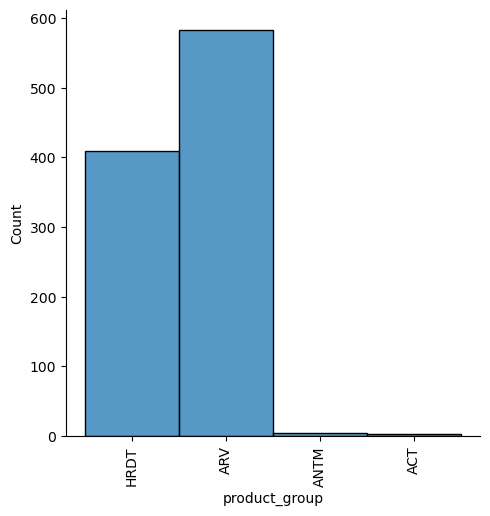

Columna:  10


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


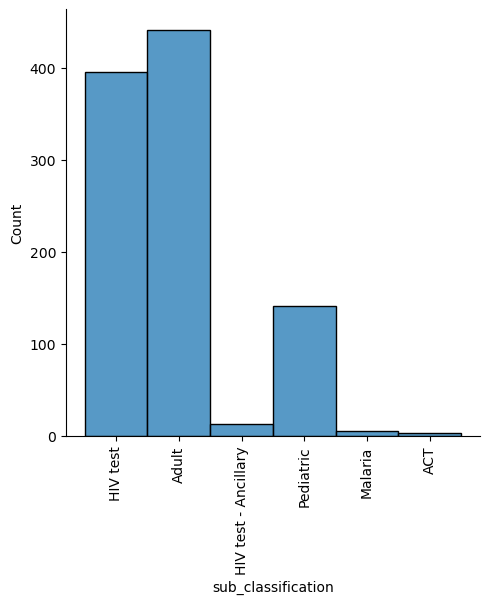

Columna:  11


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


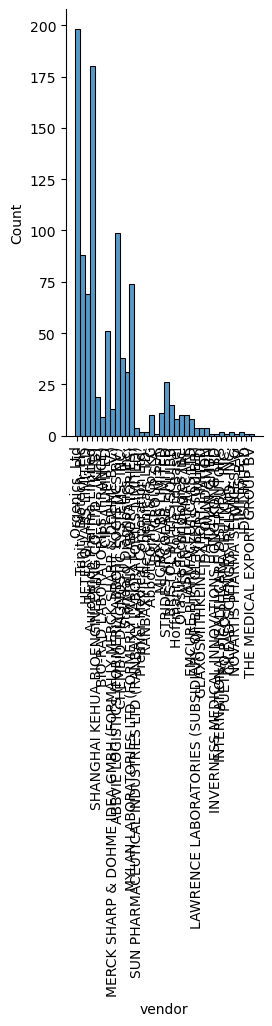

Columna:  12


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


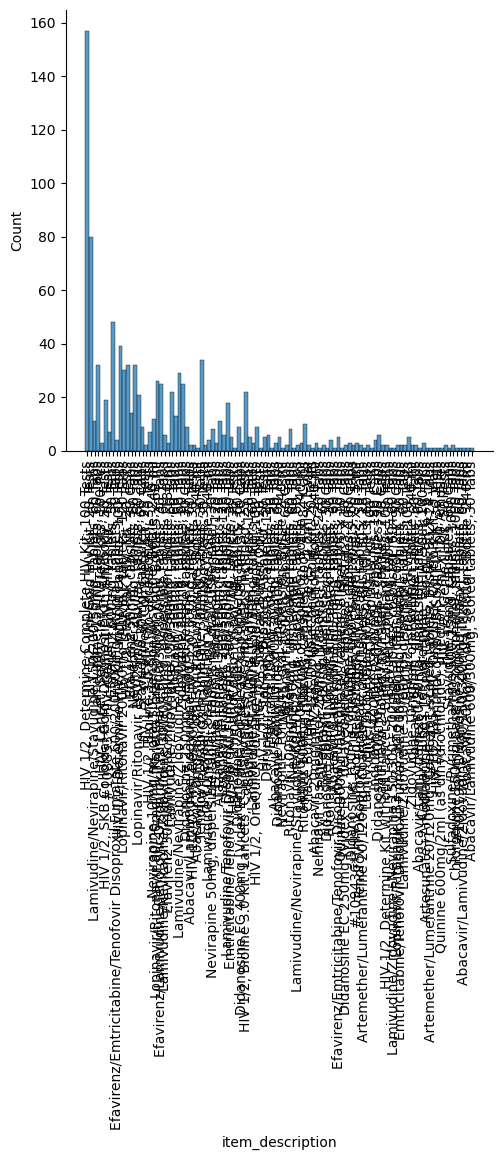

Columna:  13


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


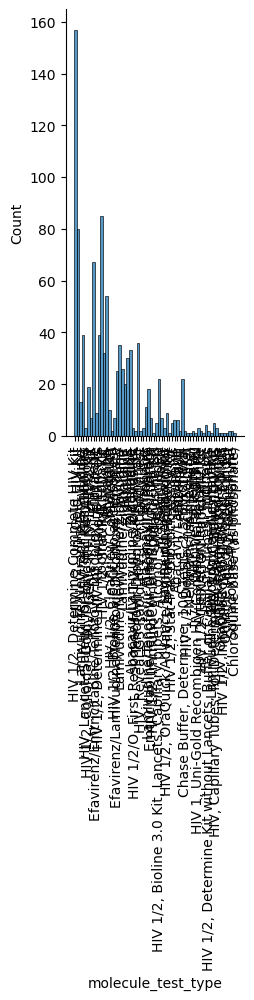

Columna:  14


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


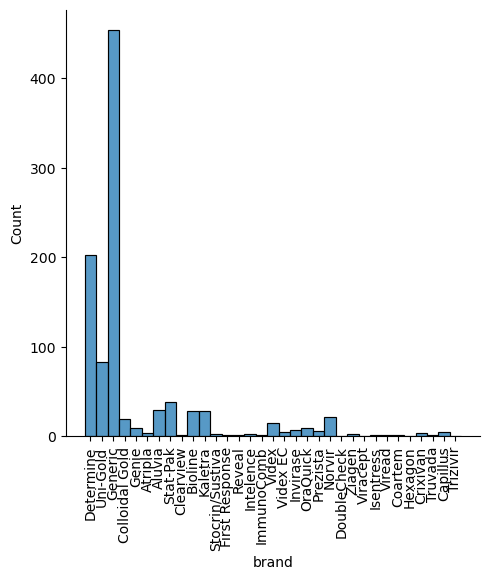

Columna:  15


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


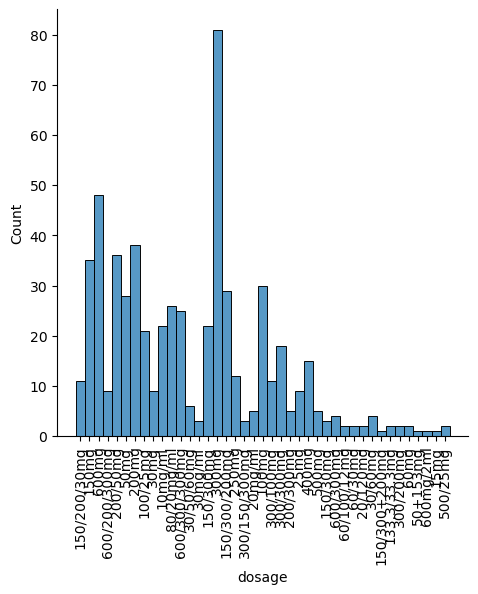

Columna:  16


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


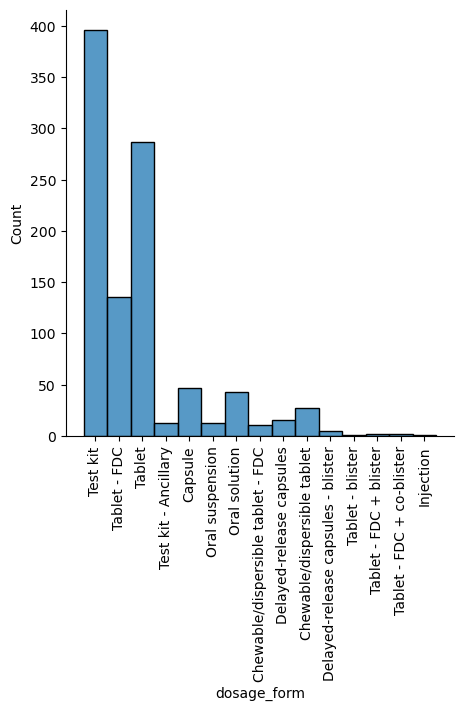

Columna:  17


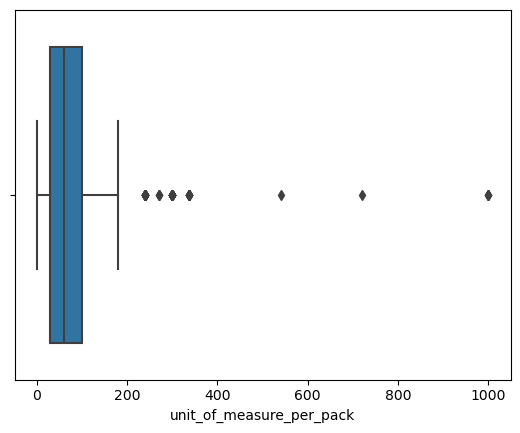

Columna:  18


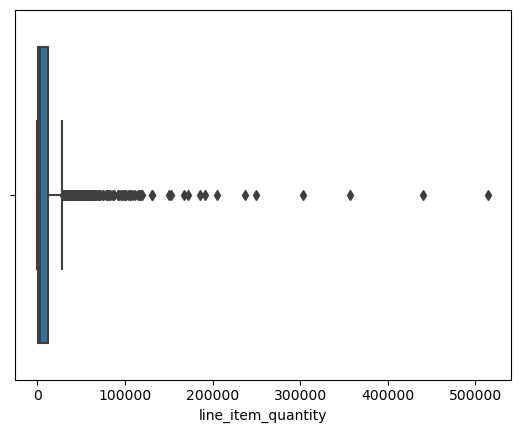

Columna:  19


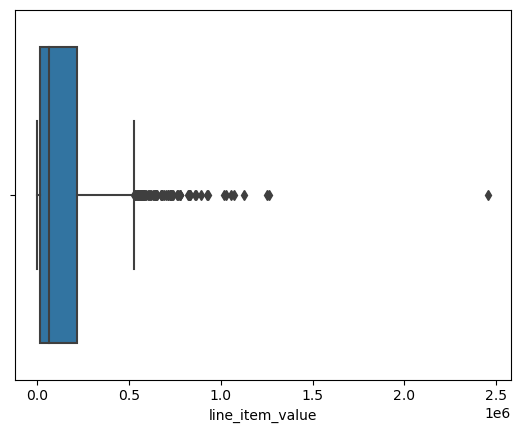

Columna:  20


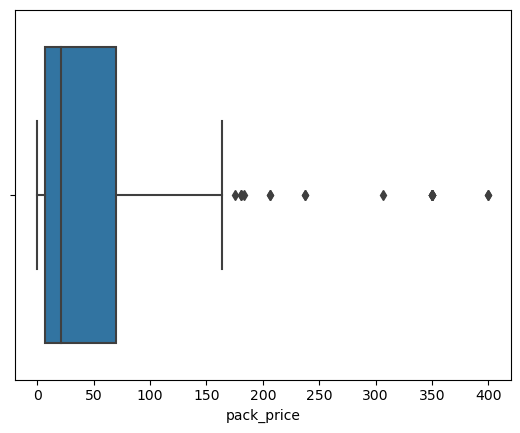

Columna:  21


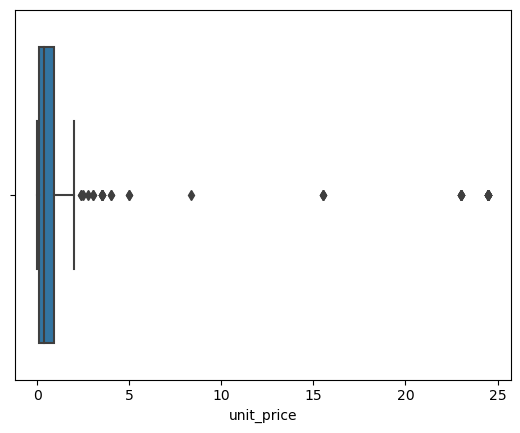

Columna:  22


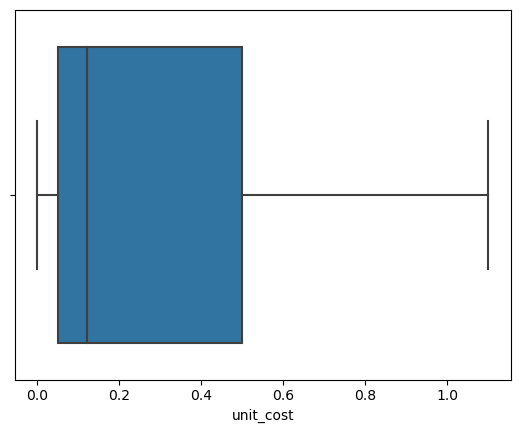

Columna:  23


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


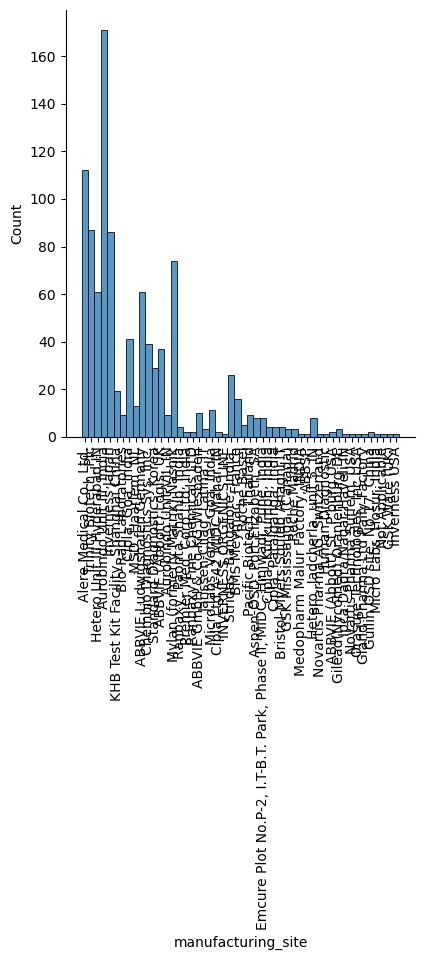

Columna:  24


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


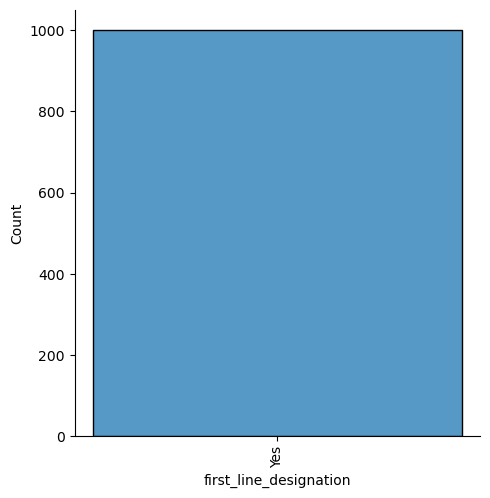

Columna:  25


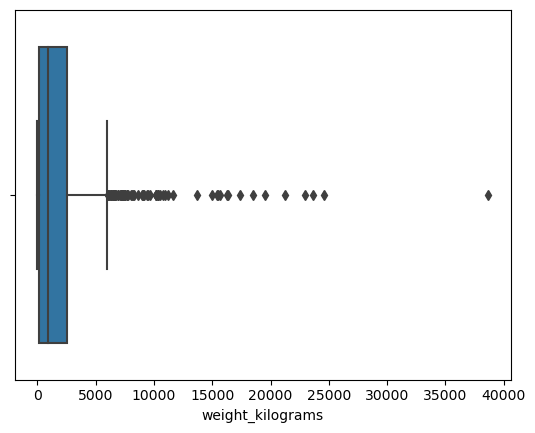

Columna:  26


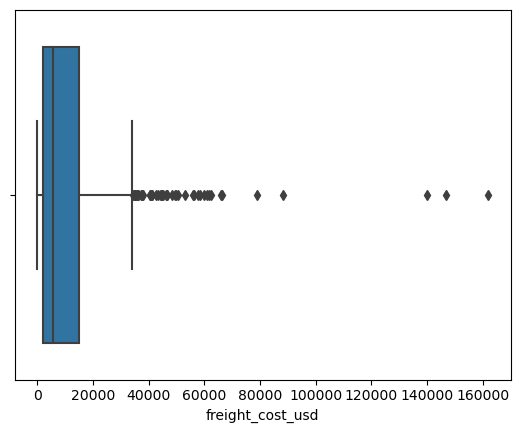

Columna:  27


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


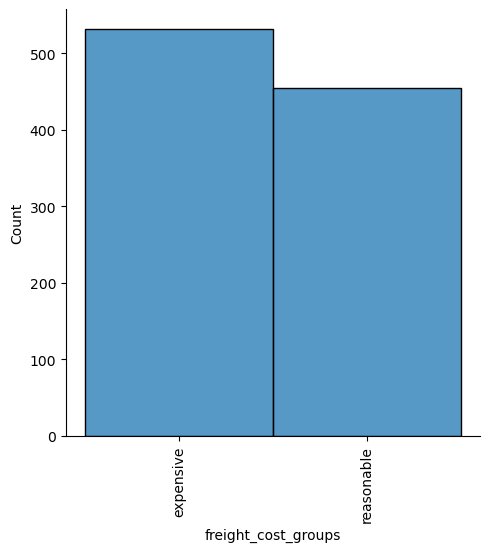

Columna:  28


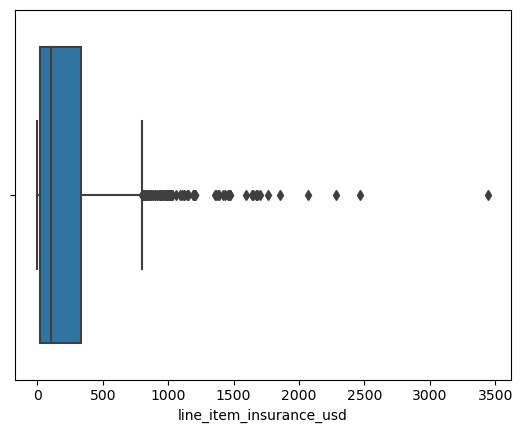

In [13]:
i = 0
for column in df.columns:
    i = i+1
    print("Columna: ", i)
    if (df[column].dtype == "object"):
        sns.displot(data=df, x="{}".format(column), kind="hist")
        plt.xticks(rotation=90)
        plt.show()
    else:
        sns.boxplot(data=df, x="{}".format(column))
        plt.show()

<p style ="color:blue;">
    Se detectaron 9 columnas numéricas que cuentan con datos anómalos, las cuales son: late_delivery, unit_of_measure_per_pack, line_item_quantity, line_item_value, pack_price, unit_price, weight_kilograms, freight_cost_usd y line_item_insurance_usd. No se detectaron columnas objeto con datos anómalos.
</p>

## Paso 4: Muestre las correlaciones (pearson y spearman) que hay en general (valores numéricos), puede utilizar gráficos, ¿cambian mucho los valores entre cada tipo de coeficiente de correlación?

In [14]:
df.corr(method='pearson', numeric_only=True)

,id,late_delivery,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,unit_cost,weight_kilograms,freight_cost_usd,line_item_insurance_usd
id,1.000000,0.060417,0.012164,0.091512,0.086113,-0.104808,-0.058841,-0.503447,0.056382,0.065017,0.066087
late_delivery,0.060417,1.000000,0.002790,0.040279,0.126246,0.051097,-0.042868,-0.034577,0.062662,0.063474,0.132006
unit_of_measure_per_pack,0.012164,0.002790,1.000000,-0.116644,-0.084325,0.206494,-0.162128,-0.431684,-0.043197,-0.018434,-0.079404
line_item_quantity,0.091512,0.040279,-0.116644,1.000000,0.607088,-0.238151,-0.090605,-0.181190,0.743863,0.251780,0.623454
line_item_value,0.086113,0.126246,-0.084325,0.607088,1.000000,0.011824,-0.030917,-0.189350,0.639865,0.572495,0.961744
pack_price,-0.104808,0.051097,0.206494,-0.238151,0.011824,1.000000,0.080424,0.385187,-0.207903,0.022590,0.017692
unit_price,-0.058841,-0.042868,-0.162128,-0.090605,-0.030917,0.080424,1.000000,0.800325,0.039405,0.282316,-0.038267
unit_cost,-0.503447,-0.034577,-0.431684,-0.181190,-0.189350,0.385187,0.800325,1.000000,-0.192516,-0.392305,-0.192415
weight_kilograms,0.056382,0.062662,-0.043197,0.743863,0.639865,-0.207903,0.039405,-0.192516,1.000000,0.496740,0.662617
freight_cost_usd,0.065017,0.063474,-0.018434,0.251780,0.572495,0.022590,0.282316,-0.392305,0.496740,1.000000,0.472532


In [15]:
df.corr(method='spearman', numeric_only=True)

,id,late_delivery,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,unit_cost,weight_kilograms,freight_cost_usd,line_item_insurance_usd
id,1.000000,0.061407,0.014583,0.099162,0.066871,-0.083258,-0.099070,-0.590547,0.059319,0.023845,0.043288
late_delivery,0.061407,1.000000,0.076509,0.106965,0.172973,0.062250,0.022577,0.186682,0.137584,0.103445,0.183476
unit_of_measure_per_pack,0.014583,0.076509,1.000000,-0.156105,0.032817,0.327393,-0.298297,-0.522619,-0.055210,0.029569,0.045148
line_item_quantity,0.099162,0.106965,-0.156105,1.000000,0.779751,-0.489412,-0.390340,-0.542665,0.886139,0.595014,0.763196
line_item_value,0.066871,0.172973,0.032817,0.779751,1.000000,0.123140,0.091047,-0.001228,0.807437,0.721744,0.989540
pack_price,-0.083258,0.062250,0.327393,-0.489412,0.123140,1.000000,0.775765,0.600738,-0.273783,0.054271,0.143662
unit_price,-0.099070,0.022577,-0.298297,-0.390340,0.091047,0.775765,1.000000,0.865397,-0.223737,0.046473,0.110120
unit_cost,-0.590547,0.186682,-0.522619,-0.542665,-0.001228,0.600738,0.865397,1.000000,-0.497238,-0.376919,0.000000
weight_kilograms,0.059319,0.137584,-0.055210,0.886139,0.807437,-0.273783,-0.223737,-0.497238,1.000000,0.747872,0.796384
freight_cost_usd,0.023845,0.103445,0.029569,0.595014,0.721744,0.054271,0.046473,-0.376919,0.747872,1.000000,0.704827


<p style ="color:blue;">
    Sí. Dependiendo de los valores a evaluar, la diferencia puede ser de +/- 0.05 o incluso de +/- 0.5, y en algunos casos particulares la correlación cambia de signo, de positivo a negativo.
</p>

## Paso 5: Muestre los gráficos de distribución de las columnas, elija el tipo de gráfico adecuado para el tipo de variable que está analizando.

Columna:  1


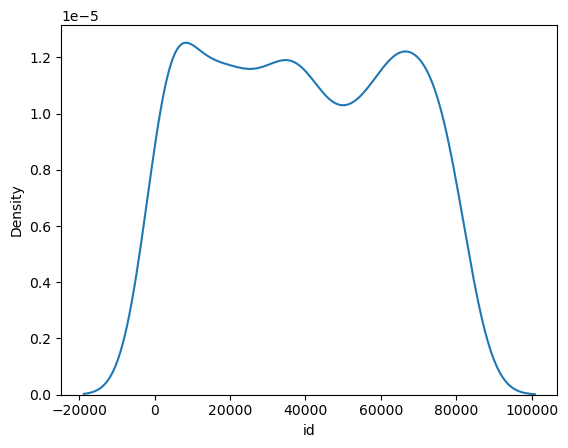

Columna:  2


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


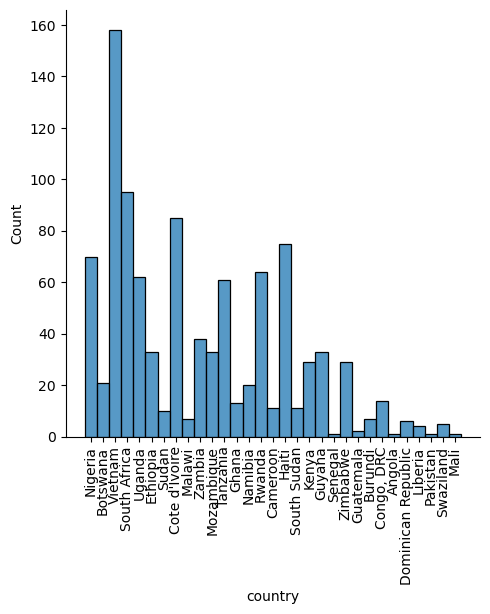

Columna:  3


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


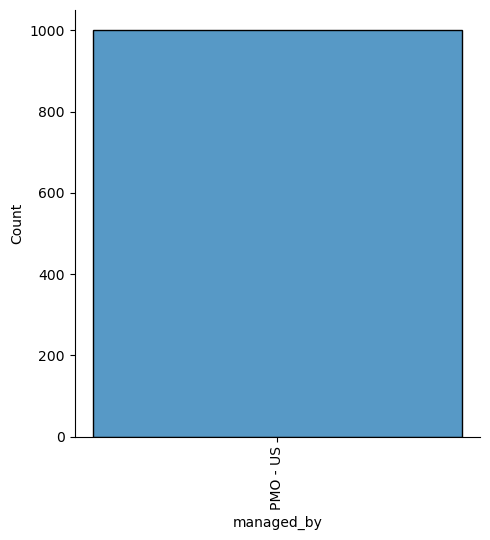

Columna:  4


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


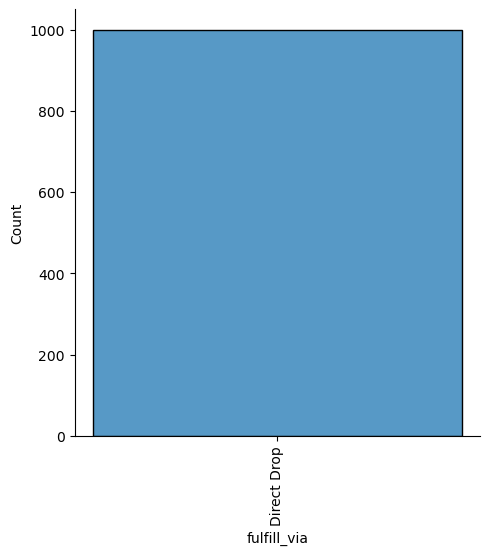

Columna:  5


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


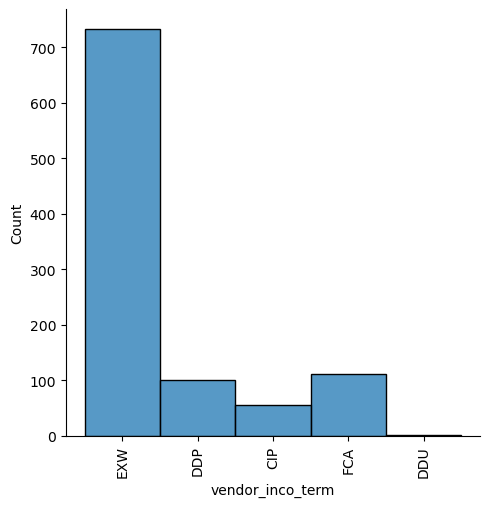

Columna:  6


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


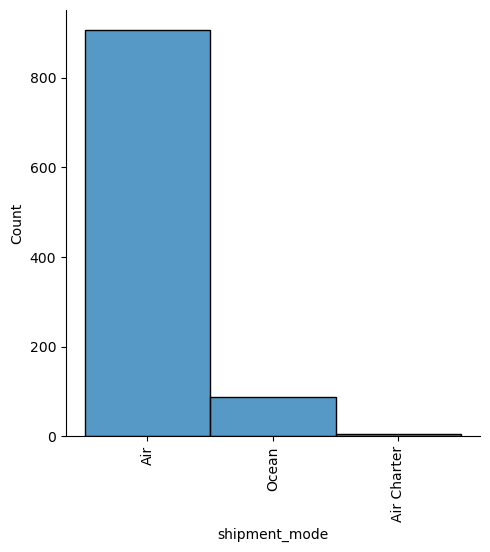

Columna:  7


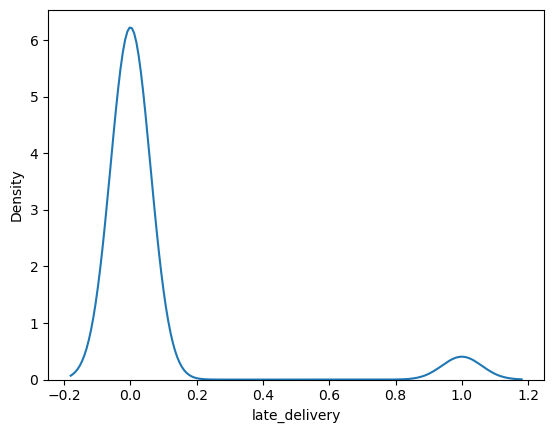

Columna:  8


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


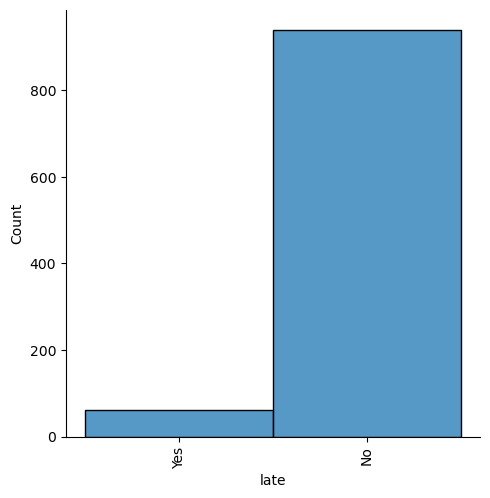

Columna:  9


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


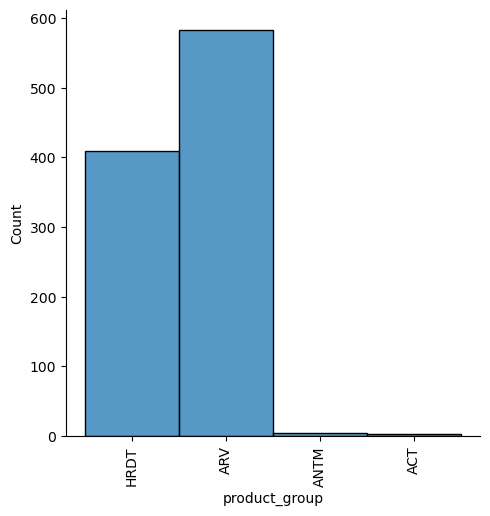

Columna:  10


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


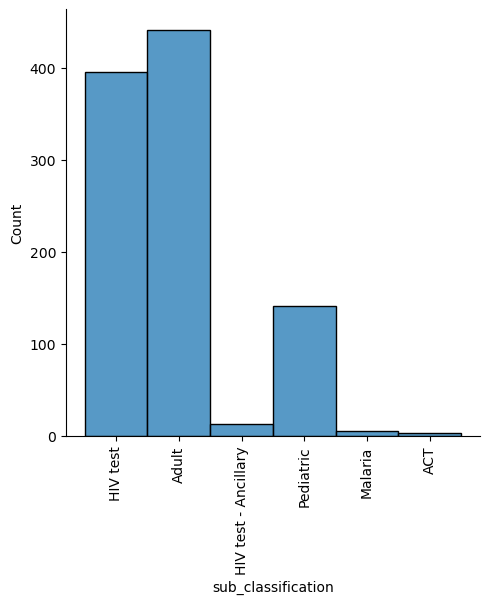

Columna:  11


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


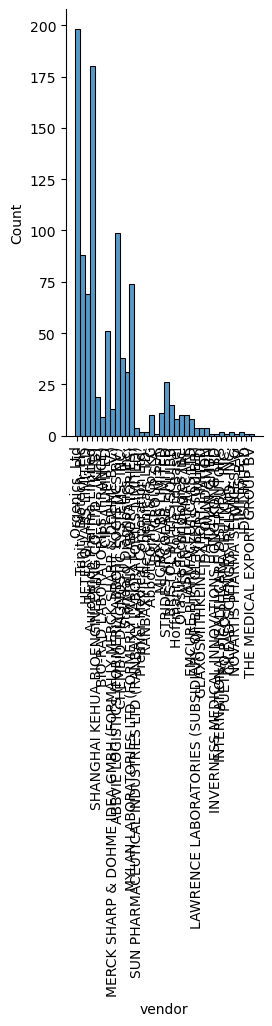

Columna:  12


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


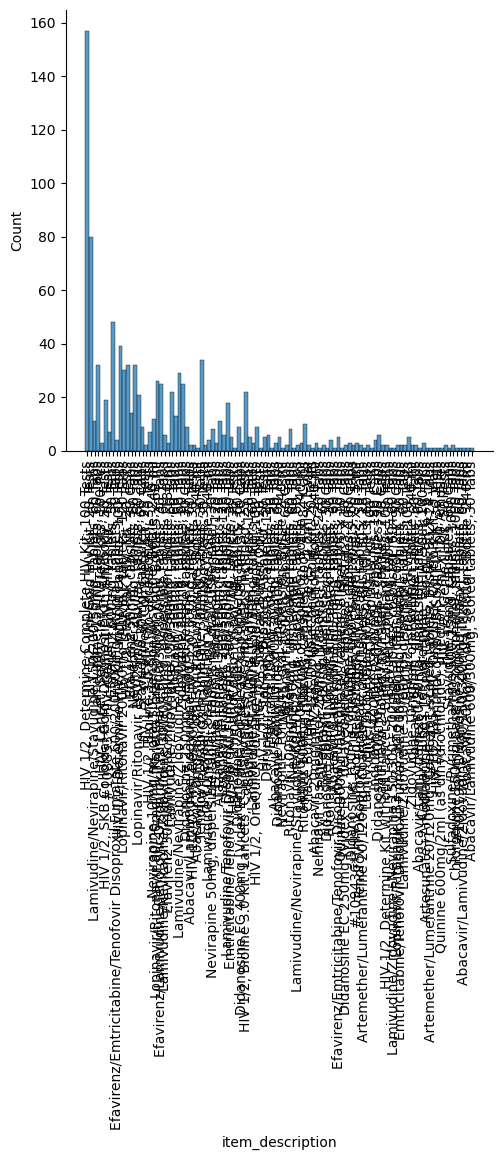

Columna:  13


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


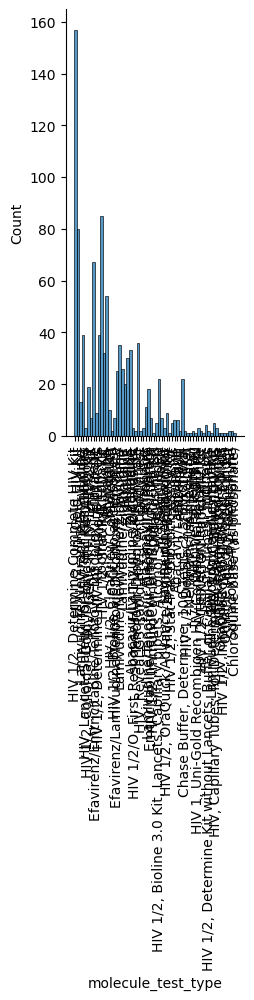

Columna:  14


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


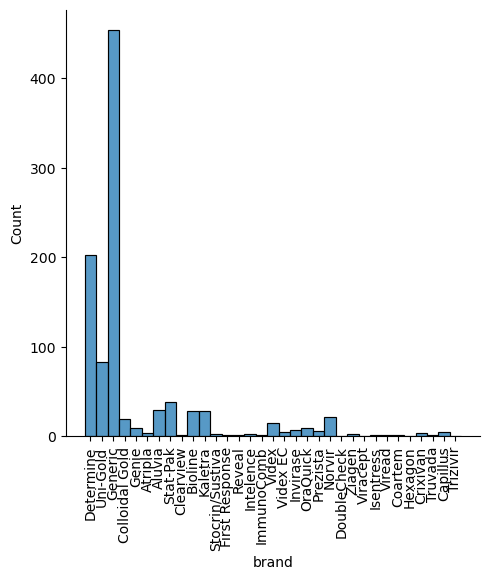

Columna:  15


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


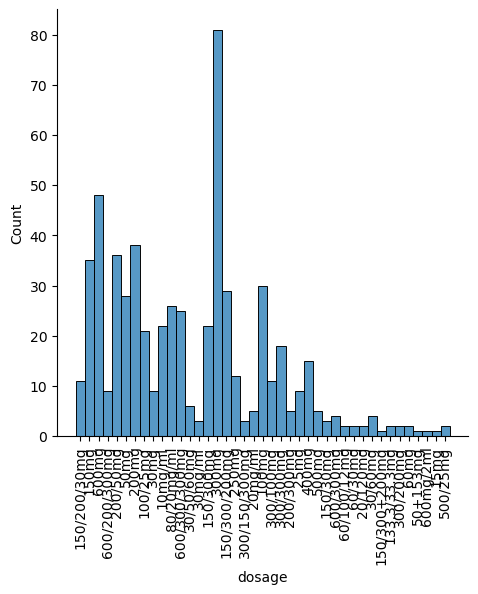

Columna:  16


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


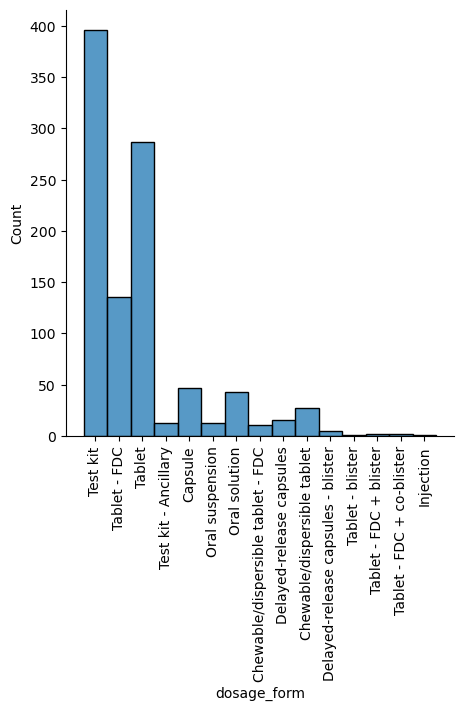

Columna:  17


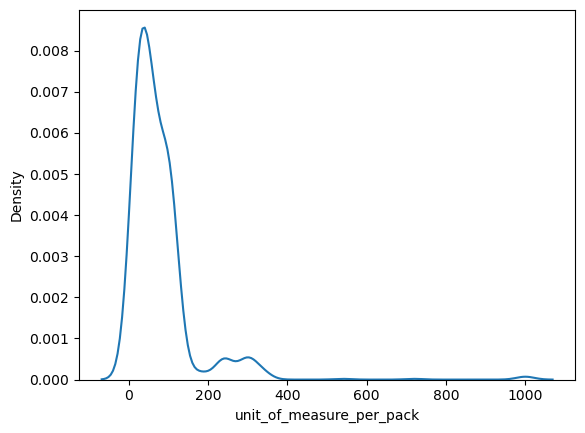

Columna:  18


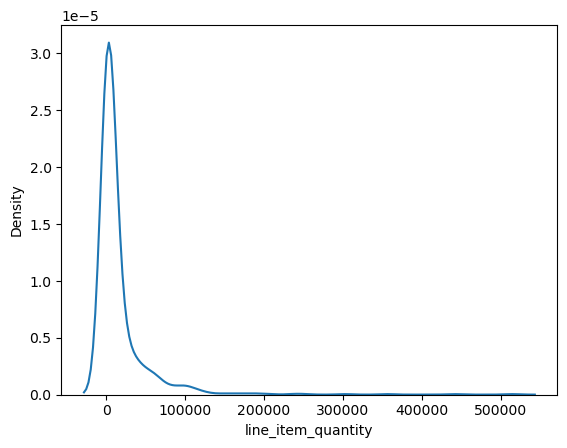

Columna:  19


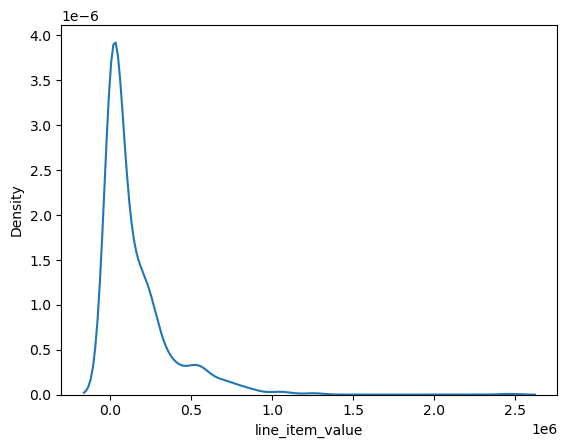

Columna:  20


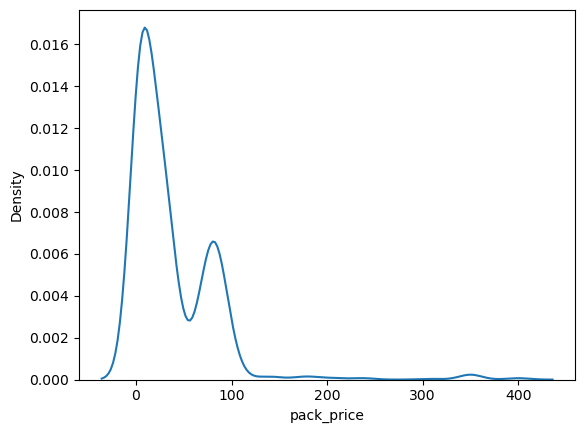

Columna:  21


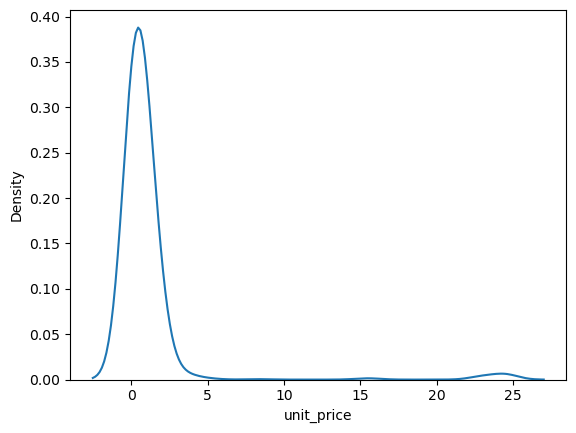

Columna:  22


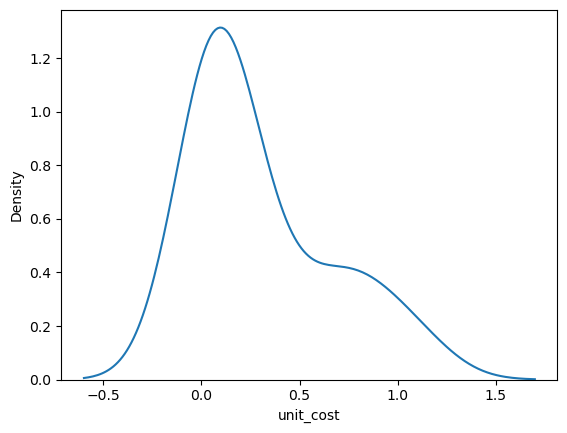

Columna:  23


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


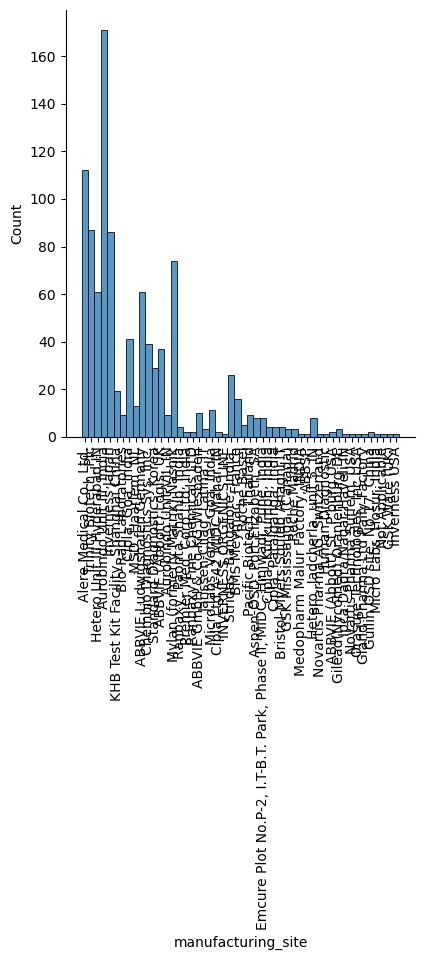

Columna:  24


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


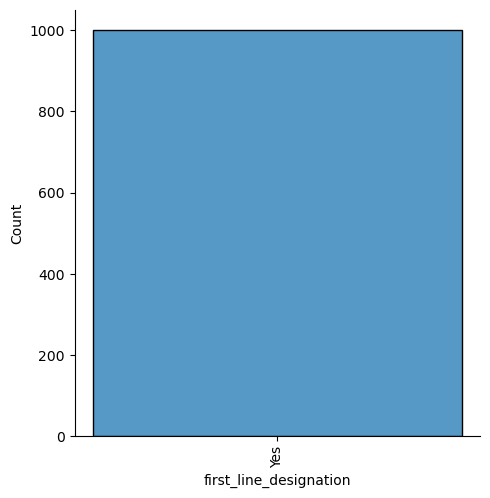

Columna:  25


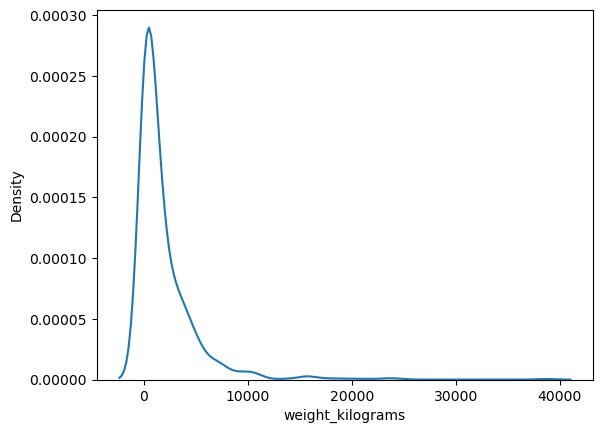

Columna:  26


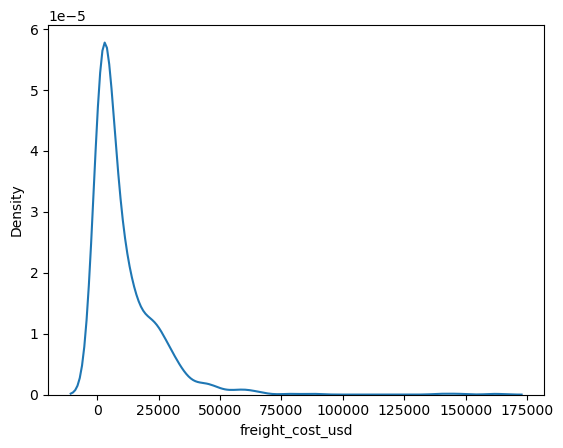

Columna:  27


C:\Users\axelv\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


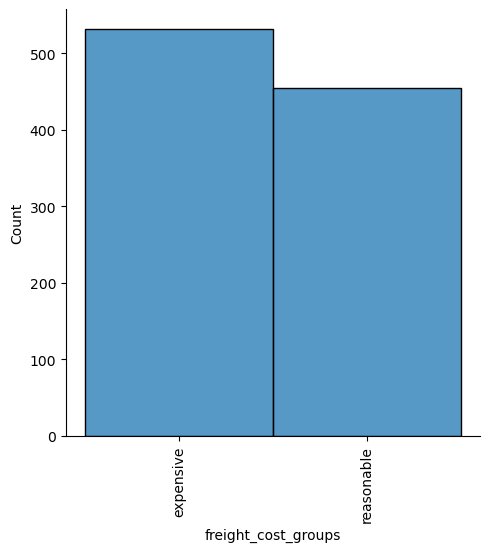

Columna:  28


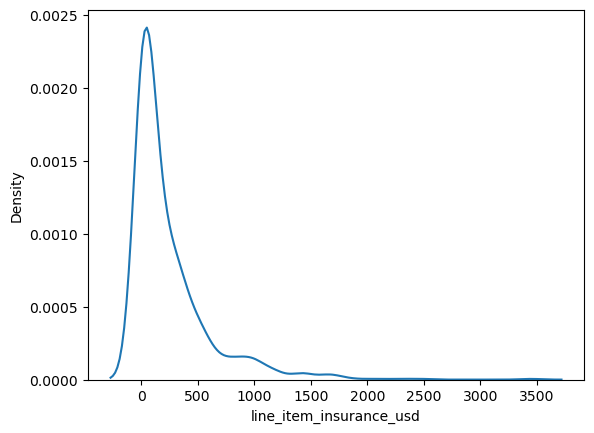

In [16]:
i = 0
for column in df.columns:
    i = i+1
    print("Columna: ", i)
    if (df[column].dtype == "object"):
        sns.displot(data=df, x="{}".format(column), kind="hist")
        plt.xticks(rotation=90)
        plt.show()
    else:
        sns.kdeplot(data=df, x="{}".format(column))
        plt.show()

# ETAPA 2: Manipulación y tratamiento de los datos.

## Paso 1: Trate los datos nulos, emplee las técnicas que considere más adecuadas de acuerdo al caso específico. Justifique el porqué de la técnicas que escogió.

In [17]:
# Su código aquí.

## Paso 2: Convierta en categorías las variables objeto que considere adecuadas, en caso de ser necesario, trate las inconsistencias.

In [18]:
# Su código aquí.

## Paso 3: Utilice el coeficiente de variación para determinar qué columnas (variables) numéricas tienen mayor dispersión.

In [19]:
# Su código aquí.

## Paso 4: De las variables con mayor dispersión, presente su distribución, su gráfico boxplot, y describa a qué se debe que haya tanta dispersión.

In [20]:
# Su código aquí.

## Paso 5: Conteste las siguientes preguntas acorde a la información obtenida de los datos.
#### ¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "line_item_insurance_usd"?
#### ¿Considera que con los datos numéricos actuales se pueden realizar predicciones para la columna "late_delivery"?
#### ¿Cree que alguna otra columna (objeto o categórica) se pueda correlacionar fuertemente con "late_delivery"?, si es así, ¿cuál o cuáles cree que tendrían una correlación fuerte?

# ETAPA 3: Construcción de un modelo de regresión lineal.

## Paso 1: Seleccionar las columnas que estén más correlacionadas con "line_item_insurance_usd" y asígnelas en la variable "X", seleccione la columna "line_item_insurance_usd" y asignela a la variable "y".

In [21]:
# Su código aquí.

## Paso 2: Divida en dos muestras los dos dataframes creados anteriormente (X,y), debe tener una muestra para entrenamiento y otra para pruebas, el tamaño de la muestra de entrenamiento debe ser del 80%, asigne una semilla aleatoria con valor de 2033 para poder brindar reproducibilidad.

In [22]:
# Su código aquí.

## Paso 3: Importe el modelo de regresión lineal (multivariable) de sklearn, entrene el modelo con el set de datos de entrenamiento, posteriormente haga predicciones con el set de pruebas (X_train).

In [23]:
# Su código aquí.

## Paso 4: Evalúe el modelo con la métrica "accuracy_score" y la métrica "f1_score" (ambas disponibles con sklearn).

In [24]:
# Su código aquí.

## Paso 5: Responda.
#### ¿Su modelo fue capaz de realizar predicciones con precisión?
#### ¿A qué cree que se deba el rendimiento de su modelo?
#### Si selecciona todas las variables y las asigna en X, en lugar de las que tienen correlación más fuerte, ¿cree que el modelo mejore o empeore?

# ETAPA 4: Hipótesis.

## Paso 1: Defina la hipótesis nula a partir de la siguiente pregunta:
#### ¿La proporción de entrega tarde ("late_delivery") es mayor a 0.06 (6%)?, asigne el valor de la hipótesis nula a la variable "Ho".
#### Considere un nivel de significación del 5%.

In [25]:
# Su código aquí

## Paso 2: Defina la hipótesis alternativa según la pregunta anterior, solo escríba cómo quedaría y qué tipo de prueba de hipótesis se utilizará.

Su respuesta:

## Paso 3: Haga una distribución bootstrap de la columna "late_delivery" y calcule el error estándar, guárdelo en una variable. El tamaño de la lista de la distribución de boostrap queda a libre elección, muestre un histograma de la distribución bootstrap.

In [26]:
# Su código aquí.

## Paso 4: Calcule la puntuación Z y guárdela en una variable.

In [27]:
# Su código aquí.

## Paso 5: Dependiendo del tipo de prueba, calcule el valor de P (p-value) y diga si puede rechazar (o falla al rechazar) la hipótesis nula.
## Calcule el intervalo de confianza, utilice los cuantiles adecuados dado el nivel de significación establecido previamente.

In [28]:
# Su código aquí.

# ETAPA 5: Publicando el notebook.

## Paso 1: Al igual que con el proyecto anterior, haga un repositorio público en su cuenta de GitHub.

## Paso 2: Suba este archivo jupyter-notebook junto con el archivo de instrucciones y el set de datos.

## Paso 3: Documente apropiadamente el proyecto en el repositorio público, haga uso del archivo "README" que suele crearse.

## Paso 4: Copie el enlace al repositorio y mándelo al entregar la actividad. 
# IMPORTANTE: Al entregar este proyecto, debe entregar este archivo y el enlace a la copia que estará en GitHub, se necesitan de ambas cosas.